<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#23494F ;font-family:newtimeroman;color:#7BBDA4;font-size:300%;text-align:center;border-radius:60px 1px;"> 𓆩 Content 𓆪 </p>
 
 <ul style = color:#1D2429;font-size:160%;>
    <li> Import Libraries</li>
    <li> Read Data</li>
    <li> Get information about data</li>
    <li> Splitting the data</li>
    <li> Build the model</li>
    <li> Test the model </li>
    <li> Test the Accuracy</li>
    <li> Build the same model using statsmodels</li>
    
</ul>

-----

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

---
## Read Data

In [2]:
df=pd.read_csv('/kaggle/input/student-study-hours/score_updated.csv')

-----
## Get some information

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   95 non-null     float64
 1   Scores  95 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


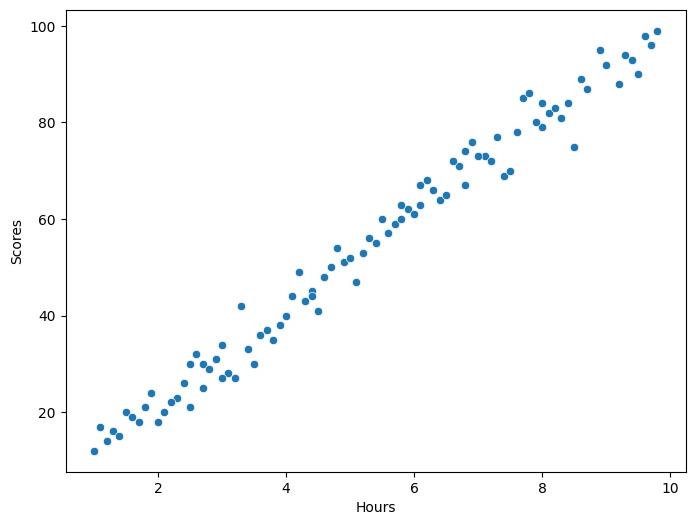

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(df,x='Hours',y='Scores')
plt.show()

----
## Splitting the data

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2)

----
## Build the model

In [9]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

------

## Test the model

In [10]:
model.coef_

array([[10.00607295]])

In [11]:
model.intercept_

array([1.49478441])

In [12]:
Y_test[:4]

array([[98],
       [96],
       [86],
       [67]])

In [13]:
Y_pred=model.predict(X_test)
Y_pred[:4]

array([[97.5530847 ],
       [98.55369199],
       [79.5421534 ],
       [62.53182939]])

In [14]:
df2=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df2

,Actual,Predicted
0,98,97.553085
1,96,98.553692
2,86,79.542153
3,67,62.531829
4,16,14.502679
5,75,86.546404
6,43,44.520898
7,81,84.545190
8,22,23.508145
9,83,83.544583


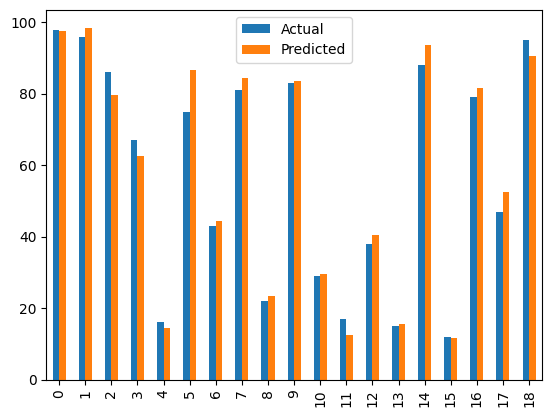

In [15]:
df2.plot(kind='bar')
plt.show()

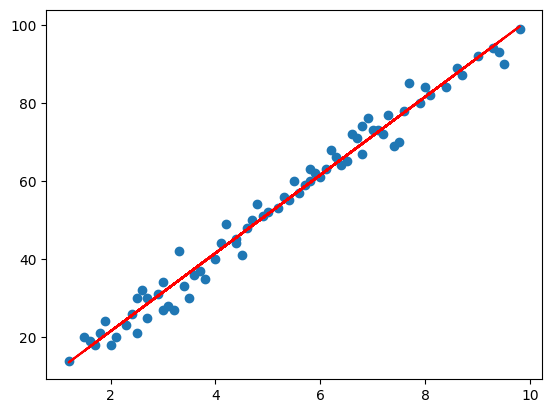

In [16]:
# for training data
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

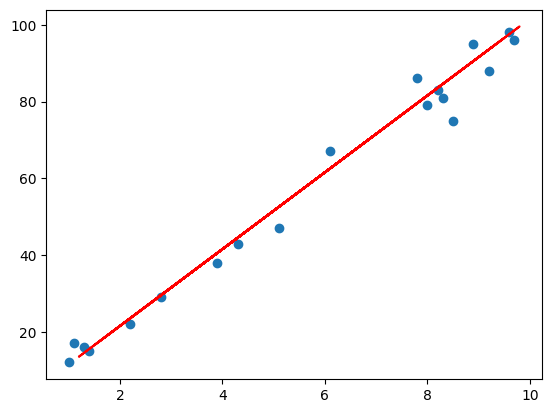

In [17]:
# for testing data
plt.scatter(X_test,Y_test)
plt.plot(X_train,model.predict(X_train),color='red')
plt.show()

----
## Test the Accuracy

In [18]:
# Accuracy for training data
r2_score(Y_train,model.predict(X_train))

0.9808176734098893

In [19]:
# Accuracy for testing data
r2_score(Y_test,Y_pred)

0.9816622281698225

----
## Build the same model using statsmodels

In [20]:
X_stat=sm.add_constant(X_train)
model2=sm.OLS(Y_train,X_stat).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3784.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           2.74e-65
Time:                        17:48:02   Log-Likelihood:                -196.27
No. Observations:                  76   AIC:                             396.5
Df Residuals:                      74   BIC:                             401.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4948      0.923      1.620      0.110      -0.344       3.334
x1            10.0061      0.163     61.512      0.000       9.682      10.330
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.498
Skew:                          -0.170   Prob(JB):                        0.779
Kurtosis:                       2.797   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<P style = "text-align:center;  color:#206C76;  font-size:300%;font-family:Comic Sans MS;">  Thanks For Reading 𓆩♡𓆪 </P>
